# **Set Up**

In [ ]:
%matplotlib inline
bs = 32 # batch size
version = 2

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Data Science/Art Recognizer

/content/drive/MyDrive/Data Science/Art Recognizer


# **Fetch Data**

In [ ]:
data_path = 'data'
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
#import os
#os.mkdir("dataloaders")
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path,bs=bs)
torch.save(dls, f"dataloaders/art_dataloader_v{version}.pkl")

In [ ]:
dls = torch.load(f"dataloaders/art_dataloader_v1.pkl", weights_only = False)

In [ ]:
dls.train.vocab

["Caravaggio's artwork", "Claude Monet's artwork", "Diego Rivera's artwork", "Edgar Degas's artwork", "Edvard Munch's artwork", "Frida Kahlo's artwork", "Gustav Klimt's artwork", "Henri Matisse's artwork", "Jackson Pollock's artwork", "Joan Miró's artwork", "Leonardo da Vinci's artwork", "Mark Rothko's artwork", "Michelangelo's artwork", "Pablo Picasso's artwork", "Paul Cézanne's artwork", "Pierre-Auguste's artwork", "Raphael's artwork", "Rembrandt van Rijn's artwork", "Salvador Dalí's artwork", "Vincent van Gogh's artwork"]

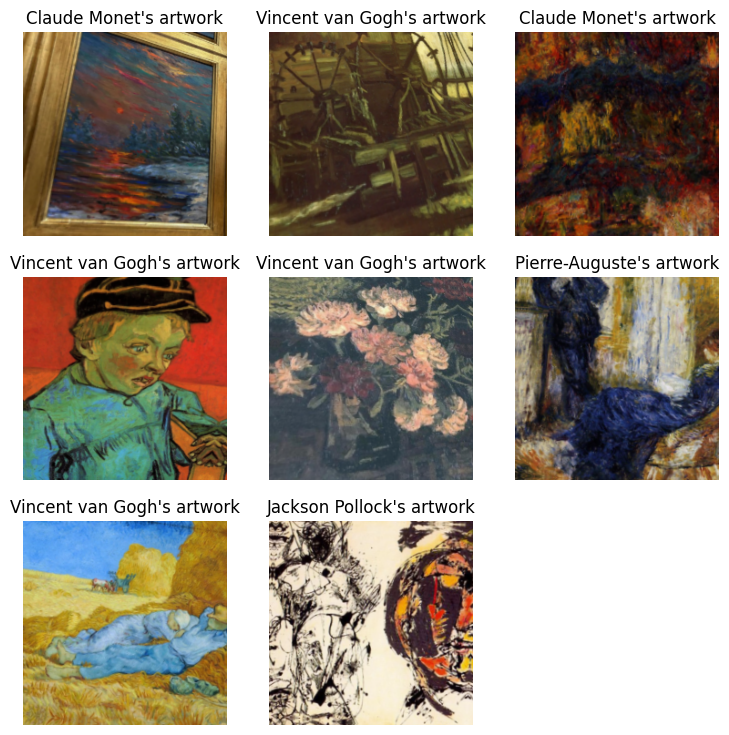

In [ ]:
dls.train.show_batch(max_n=8, nrows=3)

# **Training and Data Cleaning**

In [ ]:
model_path='models'

In [ ]:
model = vision_learner(dls, resnet50, metrics=[error_rate,accuracy])

In [ ]:
load_learner(f"{model_path}/art-recognizer-v2.pkl")

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [ ]:
model.load(f'art-recognizer-v3')

In [ ]:
model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.488245,0.846833,0.160665,0.839335,56:48


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
model.save(f'art-recognizer-v4')

NameError: name 'model' is not defined

In [ ]:
interp = ClassificationInterpretation.from_learner(model)

In [ ]:
interp.plot_confusion_matrix()

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/fetch.py", line 42, in fetch
    data = next(self.dataset_iter)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastai/data/load.py", line 140, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/usr/local/lib/python3.12/dist-packages/fastcore/basics.py", line 254, in chunked
    res = list(itertools.islice(it, chunk_sz))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastai/data/load.py", line 170, in do_item
    try: return self.after_item(self.create_item(s))
                                ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastai/data/load.py", line 177, in create_item
    if self.indexed: return self.dataset[s or 0]
                            ~~~~~~~~~~~~^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastai/data/core.py", line 454, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
                 ~~^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastai/data/core.py", line 413, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastai/data/core.py", line 373, in _after_item
    def _after_item(self, o): return self.tfms(o)
                                     ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fasttransform/transform.py", line 248, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fasttransform/transform.py", line 197, in compose_tfms
    x = f(x, **kwargs)
        ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fasttransform/transform.py", line 114, in __call__
    def __call__(self,*args,split_idx=None, **kwargs): return self._call('encodes', *args, split_idx=split_idx, **kwargs)
                                                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fasttransform/transform.py", line 125, in _call
    return self._do_call(nm, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fasttransform/transform.py", line 136, in _do_call
    return retain_type(method(*f_args,**kwargs), x, ret_type)
                       ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastai/vision/core.py", line 127, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastai/vision/core.py", line 100, in load_image
    im = Image.open(fn)
         ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/PIL/Image.py", line 3513, in open
    fp = builtins.open(filename, "rb")
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: "data/Henri Matisse's artwork/26dc2960-1c58-46c9-97ba-0859a1c4b240.jpg"


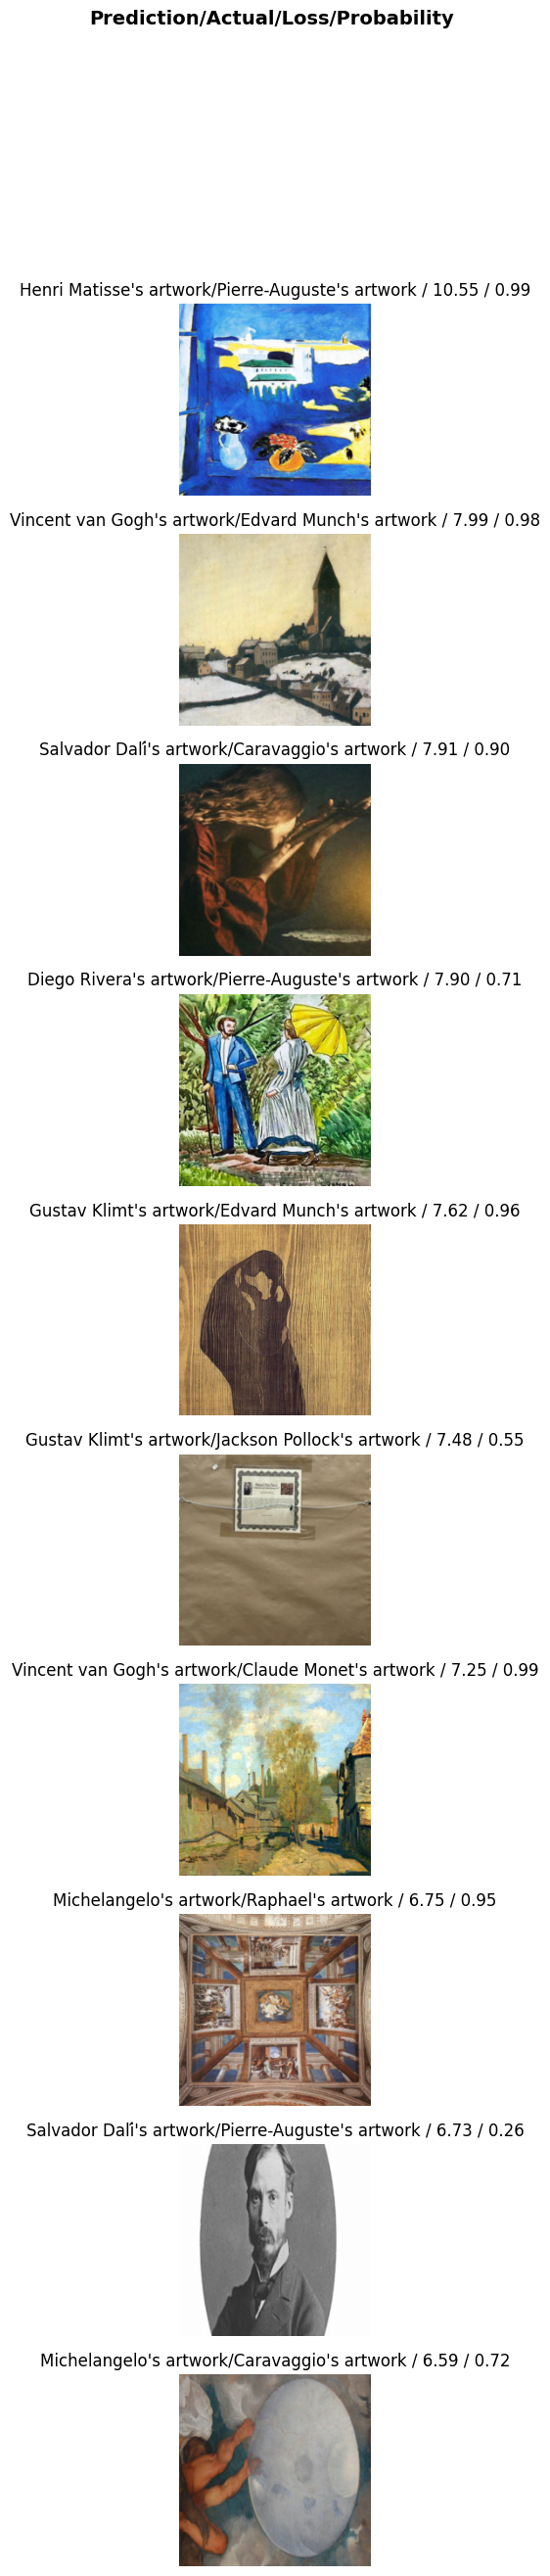

In [ ]:
interp.plot_top_losses(10, nrows=10)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}")

In [ ]:
model.export(f"{model_path}/art-recognizer-v{version+1}.pkl")